In [2]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from google.colab import files
uploaded = files.upload()

Saving EEGMouse_alan_1_1_69.npy to EEGMouse_alan_1_1_69.npy


In [19]:
sig = np.load('/content/EEGMouse_alan_1_1_69.npy')

In [11]:
sig.shape # [channels, time steps]

(16, 867)

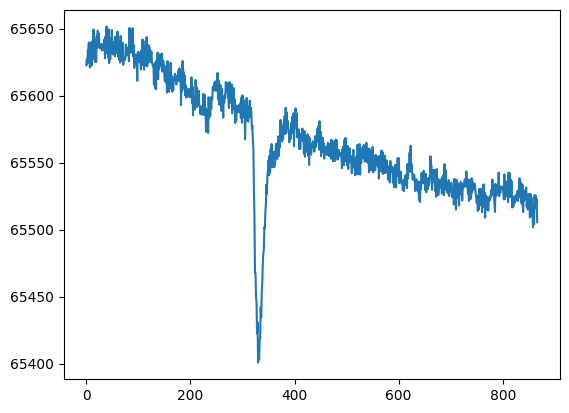

In [12]:
plt.plot(sig[0,:]) # plot first channel of eeg signal

## low and high pass filter

Scipy docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

In [14]:
# low pass filter attenuates frequencies above a critical value (upper_bound)
order = 4
upper_bound = 40
sampling_freq = 125

b, a = scipy.signal.butter(order, upper_bound, btype = 'low', fs = sampling_freq)
processed_signal = scipy.signal.filtfilt(b, a, sig, 1)

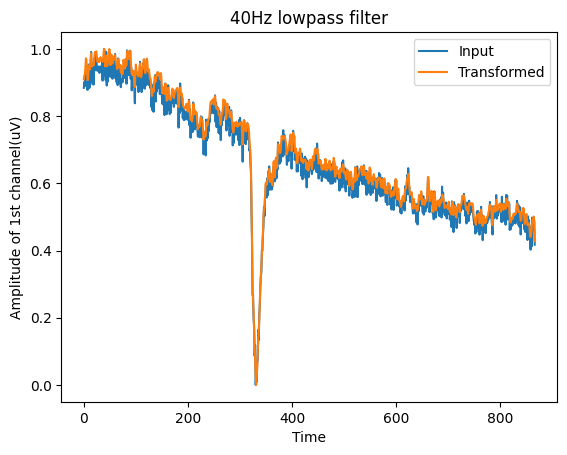

In [15]:
# must normalize to visualize both original and filtered signal on same plot
plt.figure()
plt.xlabel('Time')
plt.ylabel('Amplitude of 1st channel(uV)')
plt.title('40Hz lowpass filter')

# get array filled with minimum and maximum in each channel
signal_min = np.full((sig.shape[1], sig.shape[0]), np.min(sig, 1)).transpose()
signal_max = np.full((sig.shape[1], sig.shape[0]), np.max(sig, 1)).transpose()

# min-max normalization of original signal
normed_signal = (sig - signal_min) / (signal_max - signal_min)

# minmax normalization of filtered signal
filtered_min = np.full((processed_signal.shape[1], processed_signal.shape[0]), np.min(processed_signal, 1)).transpose()
filtered_max = np.full((processed_signal.shape[1], processed_signal.shape[0]), np.max(processed_signal, 1)).transpose()
normed_filt = (processed_signal - filtered_min) / (filtered_max - filtered_min)

# plot first channel of both signals
plt.plot(np.arange(normed_signal[0].size), normed_signal[0], label = 'Input')
plt.plot(np.arange(normed_filt[0].size), normed_filt[0], label = 'Transformed')
plt.legend()

In [21]:
# high pass filter attenuates frequencies below a critical value (lower_bound)
order = 4
lower_bound = 5
sampling_freq = 125

b, a = scipy.signal.butter(order, lower_bound, btype = 'high', fs = sampling_freq)
processed_signal = scipy.signal.filtfilt(b, a, sig, 1)

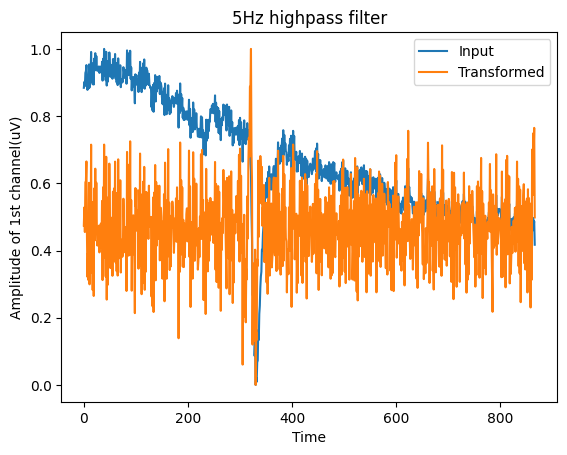

In [22]:
# must normalize to visualize both original and filtered signal on same plot
plt.figure()
plt.xlabel('Time')
plt.ylabel('Amplitude of 1st channel(uV)')
plt.title('5Hz highpass filter')

# get array filled with minimum and maximum in each channel
signal_min = np.full((sig.shape[1], sig.shape[0]), np.min(sig, 1)).transpose()
signal_max = np.full((sig.shape[1], sig.shape[0]), np.max(sig, 1)).transpose()

# min-max normalization of original signal
normed_signal = (sig - signal_min) / (signal_max - signal_min)

# minmax normalization of filtered signal
filtered_min = np.full((processed_signal.shape[1], processed_signal.shape[0]), np.min(processed_signal, 1)).transpose()
filtered_max = np.full((processed_signal.shape[1], processed_signal.shape[0]), np.max(processed_signal, 1)).transpose()
normed_filt = (processed_signal - filtered_min) / (filtered_max - filtered_min)

# plot first channel of both signals
plt.plot(np.arange(normed_signal[0].size), normed_signal[0], label = 'Input')
plt.plot(np.arange(normed_filt[0].size), normed_filt[0], label = 'Transformed')
plt.legend()

## bandpass filtering

In [23]:
# bandpass filters attenuate frequencies outside of a band (crit_freq)
order = 4
crit_freq = [5, 40]
sampling_freq = 125

b, a = scipy.signal.butter(order, crit_freq, btype = 'bandpass', fs = sampling_freq)
processed_signal = scipy.signal.filtfilt(b, a, sig, 1)

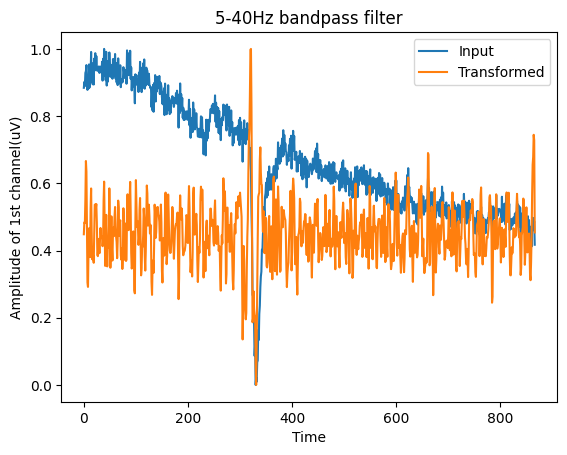

In [24]:
# must normalize to visualize both original and filtered signal on same plot
plt.figure()
plt.xlabel('Time')
plt.ylabel('Amplitude of 1st channel(uV)')
plt.title('5-40Hz bandpass filter')

# get array filled with minimum and maximum in each channel
signal_min = np.full((sig.shape[1], sig.shape[0]), np.min(sig, 1)).transpose()
signal_max = np.full((sig.shape[1], sig.shape[0]), np.max(sig, 1)).transpose()

# min-max normalization of original signal
normed_signal = (sig - signal_min) / (signal_max - signal_min)

# minmax normalization of filtered signal
filtered_min = np.full((processed_signal.shape[1], processed_signal.shape[0]), np.min(processed_signal, 1)).transpose()
filtered_max = np.full((processed_signal.shape[1], processed_signal.shape[0]), np.max(processed_signal, 1)).transpose()
normed_filt = (processed_signal - filtered_min) / (filtered_max - filtered_min)

# plot first channel of both signals
plt.plot(np.arange(normed_signal[0].size), normed_signal[0], label = 'Input')
plt.plot(np.arange(normed_filt[0].size), normed_filt[0], label = 'Transformed')
plt.legend()

## notch/bandstop filter

In [27]:
# bandstop filters attenuate frequencies within a band (crit_freq)
order = 4
crit_freq = [5, 40]
sampling_freq = 125

b, a = scipy.signal.butter(order, crit_freq, btype = 'bandstop', fs = sampling_freq)
processed_signal = scipy.signal.filtfilt(b, a, sig, 1)

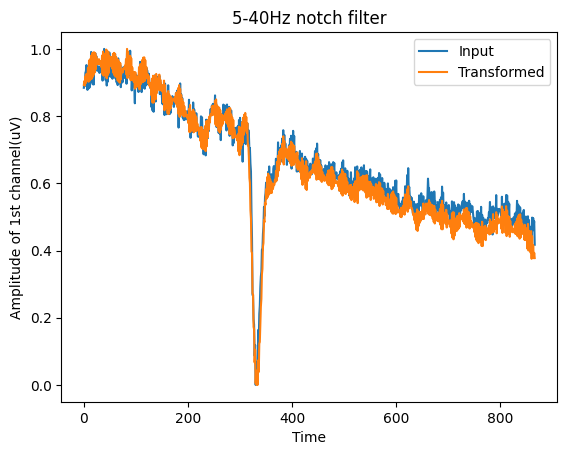

In [28]:
# must normalize to visualize both original and filtered signal on same plot
plt.figure()
plt.xlabel('Time')
plt.ylabel('Amplitude of 1st channel(uV)')
plt.title('5-40Hz notch filter')

# get array filled with minimum and maximum in each channel
signal_min = np.full((sig.shape[1], sig.shape[0]), np.min(sig, 1)).transpose()
signal_max = np.full((sig.shape[1], sig.shape[0]), np.max(sig, 1)).transpose()

# min-max normalization of original signal
normed_signal = (sig - signal_min) / (signal_max - signal_min)

# minmax normalization of filtered signal
filtered_min = np.full((processed_signal.shape[1], processed_signal.shape[0]), np.min(processed_signal, 1)).transpose()
filtered_max = np.full((processed_signal.shape[1], processed_signal.shape[0]), np.max(processed_signal, 1)).transpose()
normed_filt = (processed_signal - filtered_min) / (filtered_max - filtered_min)

# plot first channel of both signals
plt.plot(np.arange(normed_signal[0].size), normed_signal[0], label = 'Input')
plt.plot(np.arange(normed_filt[0].size), normed_filt[0], label = 'Transformed')
plt.legend()

## signal segmentation/cropping

segmentation involves a window sliding technique that crops the signal at a fixed window size with a fixed window shift

In [54]:
# sometimes it is useful to partition eeg signals into smaller equal length segments
# this can combat overfitting and ensure consistency in input shape

# segment eeg data based on sampling freq(Hz), window_size(s), and window_shift(s)
window_size=1
window_shift=0.0175
sampling_freq = 125

w_size = int(sampling_freq * window_size)
w_shift = int(sampling_freq * window_shift)
segments = []
i = 0
while i + w_size <= sig.shape[1]:
  segments.append(sig[:, i: i + w_size])
  i += w_shift

In [55]:
print(len(segments))
print(segments[0].shape) # all segments of shape (16, 125)

372
(16, 125)


**Further Practice**
- convert the filters into functions that can be applied along any specified channel and signal
- implement other normalization techniques like standard and robust scaling
  - implement them on entire signal as opposed to a single channel
- use scipy.signal.iirnotch and scipy.signal.iirpeak to investigate high quality notch and bandpass filter that work on narrow frequency band
- visualize the output of the filters in the frequency domain using scipy.fft package
  -  **Note: Nyquist Theorem states highest frequency that can be captured accurately is 1/2 sampling frequency of digital device (125Hz in this case)**